In [133]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sci
import astropy.time as ast
%matplotlib inline

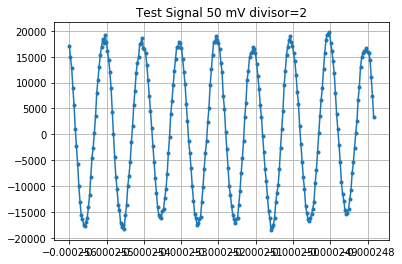

In [134]:
divisor = 2
vsamp = 62.5e6/divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)

#Test signals at 1421MHz
#Horn is at 1420MHz

test50mv = np.loadtxt('arr50mv.txt')[0:N]
test50mvdv1 = np.loadtxt('arr50mvdv1.txt')[0:N]
test100mv = np.loadtxt('arr100mv.txt')[0:N]
test100mvdv1 = np.loadtxt('arr100mvdv1.txt')[0:N]
test200mv = np.loadtxt('arr200mv.txt')[0:N]
test200mvdv1 = np.loadtxt('arr200mvdv1.txt')[0:N]

plt.plot(t[0:2**8], test50mv[0:2**8], '.-')
plt.title('Test Signal 50 mV divisor=2')
plt.grid(True)
plt.show()


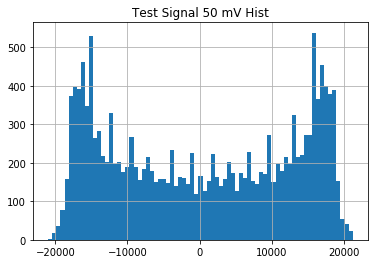

In [135]:
#Bimodal distribution??
plt.hist(test50mv, bins=75)
plt.title('Test Signal 50 mV Hist')
plt.grid(True)
plt.show()

C:\Users\verde\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


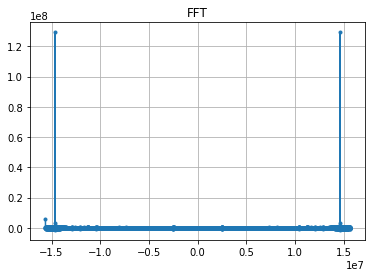

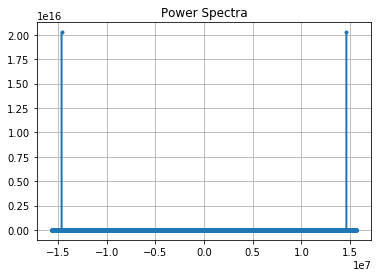

In [136]:
#Power Spectra/FFT
fft = sci.fft(test50mv)
power = np.abs(fft)**2

plt.plot(f,fft, '.-')
plt.title('FFT')
plt.grid(True)
plt.show()

plt.plot(f,power,'.-')
plt.title('Power Spectra')
plt.grid(True)
plt.show()

In [137]:
block1421_1a = np.genfromtxt("1421_5blocks.txt")[0:N]
block1421_1b = np.genfromtxt("1421_5blocks.txt")[N:N*2]
block1421_2a = np.genfromtxt("1421_5blocks.txt")[N*2:N*3]
block1421_2b = np.genfromtxt("1421_5blocks.txt")[N*3:N*4]
block1421_3a = np.genfromtxt("1421_5blocks.txt")[N*4:N*5]
block1421_3b = np.genfromtxt("1421_5blocks.txt")[N*5:N*6]
block1421_4a = np.genfromtxt("1421_5blocks.txt")[N*6:N*7]
block1421_4b = np.genfromtxt("1421_5blocks.txt")[N*7:N*8]
block1421_5a = np.genfromtxt("1421_5blocks.txt")[N*8:N*9]
block1421_5b = np.genfromtxt("1421_5blocks.txt")[N*9:N*10]


[  1.34748570e+10   3.81400933e+08   6.19201087e+07 ...,   1.78322522e+08
   6.19201087e+07   3.81400933e+08]


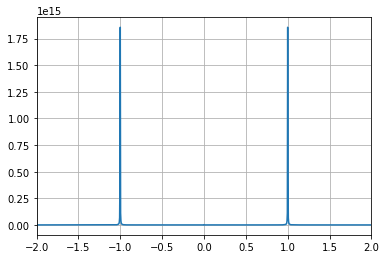

(2, 16000)


In [138]:
divisor = 1
N = 16000
vsamp = 62.5/divisor
f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)


c = np.array([block1421_1a] + [1j*block1421_1b])
power = np.abs(sci.fft(c))**2
meanpower = np.mean(np.fft.fftshift(power), axis=0)
print(meanpower)
plt.plot(f, meanpower)
plt.xlim(-2,2)
plt.grid(True)
plt.show()
print(c.shape)

[  1.34748570e+10   3.81400933e+08   6.19201087e+07 ...,   1.78322522e+08
   6.19201087e+07   3.81400933e+08]


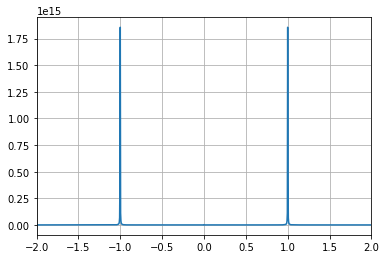

In [139]:
c = np.array([block1421_1a] + [1j*block1421_1b])
power = np.abs(sci.fft(c))**2
meanpower = np.mean(np.fft.fftshift(power), axis=0)
print(meanpower)
plt.plot(f, meanpower)
plt.xlim(-2,2)
plt.grid(True)
plt.show()

In [140]:
arr1419A = np.genfromtxt("1419_test_0.txt")[0:1584000]
arr1419B = np.genfromtxt("1419_test_0.txt")[1584000:3168000]
arr1419 = np.genfromtxt("1419_test_0.txt")
arr1421 = np.genfromtxt("1421_test_0.txt")
arr1420A = np.genfromtxt("1420_notest_0.txt")[0:1584000]
arr1420B = np.genfromtxt("1420_notest_0.txt")[1584000:3168000]
arr1420 = np.genfromtxt("1420_notest_0.txt")

In [141]:
divisor = 1
vsamp = 62.5 #divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)

powerlist = np.empty((2,16000))

for i in range(10):
    arr1420Aa = arr1420A[N*i:N*(i+1)]
    arr1420Bb = arr1420B[N*i:N*(i+1)]
    c = np.array([arr1420Bb] + [1j*arr1420Aa])
    power = np.abs(sci.fft(c))**2
    powerlist = np.append(powerlist, power, axis=0)


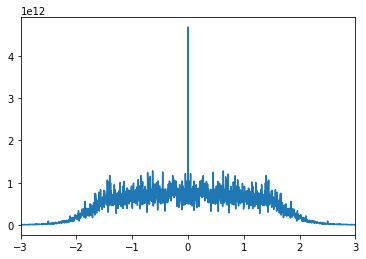

In [142]:
meanpower = np.mean(powerlist, axis=0)
plt.xlim(-3,3)
plt.plot(f, np.fft.fftshift(meanpower))
plt.show()

In [143]:
def make_complex(data, nblocs):
    split = np.array(np.split(data, 2*nblocs))
    real =  np.array(np.arange(0, 2*nblocs) >= nblocs, dtype = bool)
    imag = np.invert(real)
    return split[real] + 1j*split[imag]

In [144]:
c1 = make_complex(arr1419, 99)
c2 = make_complex(arr1421, 99)

In [145]:
def find_avg_power(c, n):
    power = np.abs(sci.fft(c))**2
    meanpower = np.mean(power, axis=0)
    print(meanpower.shape)

    plt.plot(f, np.fft.fftshift(meanpower))
    plt.xlabel('Frequency',fontsize=16)
    plt.ylabel('Voltage Time',fontsize=16)
    plt.title(str(n))
    plt.xlim(-1.5,1.5)
    plt.ylim(0,1e16)
    plt.show()

(16000,)


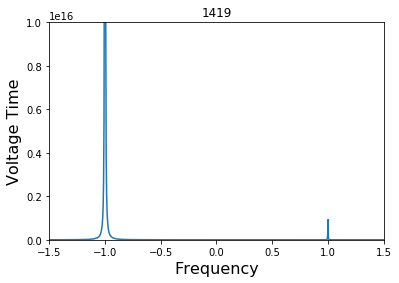

(16000,)


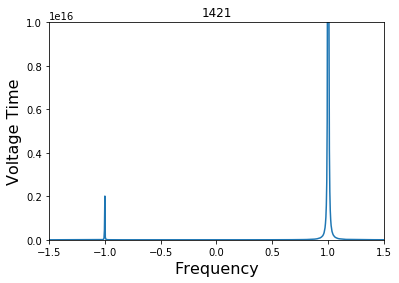

In [146]:
find_avg_power(c1, 1419)
find_avg_power(c2, 1421)

In [147]:
c3 = make_complex(arr1420, 99)

(99, 16000)


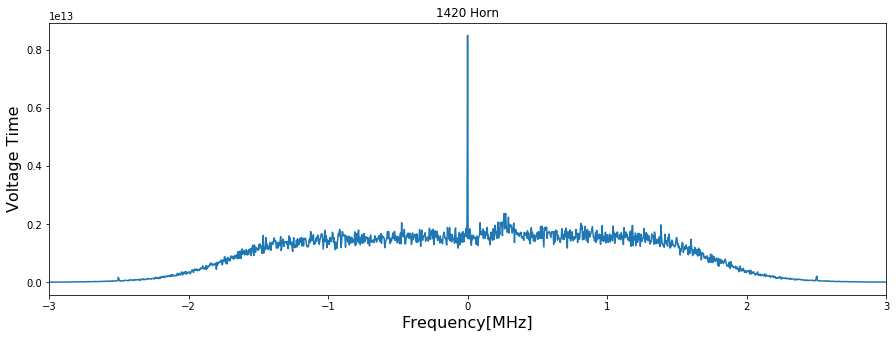

In [166]:
divisor = 1
vsamp = 62.5 #divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)

print(c3.shape)
c3fft = sci.fft(c3)
c3power = np.abs(c3fft)**2
c3mean = np.mean(c3power,axis=0)

plt.figure(figsize=(15,5))
plt.plot(f, np.fft.fftshift(c3mean))
plt.title('1420 Horn')
plt.xlabel('Frequency[MHz]',fontsize=16)
plt.ylabel('Voltage Time',fontsize=16)
plt.xlim(-3,3)
plt.show()

In [149]:
arr1231 = np.zeros((50,16000))
arr1229 = np.zeros((50,16000))

for i in range(20):
    loop1231 = np.genfromtxt('1231USB/1231_USB_'+ str(i)+'.txt')
    loop1231 = np.asarray(loop1231)
    c1231 = make_complex(loop1231, 50)
    fft1231 = sci.fft(c1231)
    power1231 = np.abs(fft1231)**2
    arr1231 = arr1231 + power1231

for i in range(20):                
    loop1229 = np.genfromtxt('1229LSB/1229_LSB_'+str(i)+'.txt')
    loop1229 = np.asarray(loop1229)
    c1229 = make_complex(loop1229, 50)
    fft1229 = sci.fft(c1229)
    power1229 = np.abs(fft1229)**2
    arr1229 = arr1229 + power1229

In [150]:
test1 = np.genfromtxt('1229LSB/1229_LSB_1.txt')

In [151]:
bbc = np.zeros((50,16000))
for i in range(4):
    bb = np.genfromtxt('BlackBody1230\BlackBody_'+str(i)+'.txt')
    bb = np.asarray(bb)
    cbb = make_complex(bb, 50)
    fftbb =  sci.fft(cbb)
    powerbb = np.abs(fftbb)**2
    bbc = bbc + powerbb


skyc = np.zeros((50,16000))
for i in range(4):
    sky = np.genfromtxt('ColdSky1230\ColdSky_'+str(i)+'.txt')
    sky = np.asarray(sky)
    csky = make_complex(sky,50)
    fftsky = sci.fft(csky)
    powersky = np.abs(fftsky)**2
    skyc = skyc + powersky

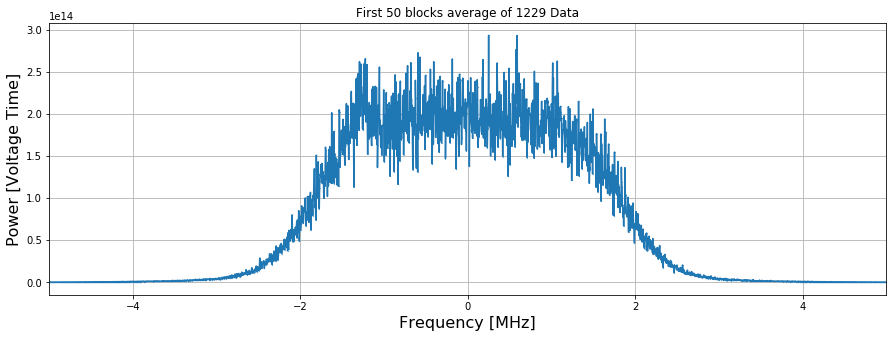

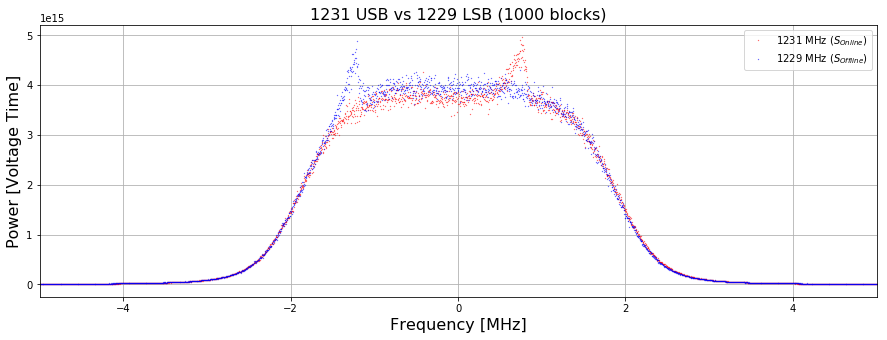

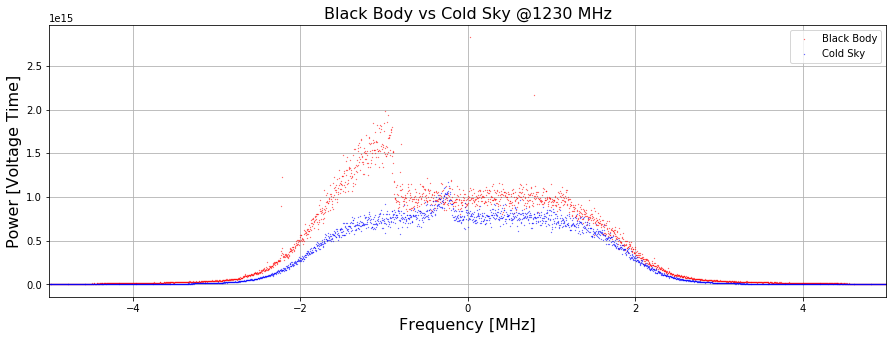

In [167]:
######################################   7.1 - LSB/USB ###############################################

divisor = 1
vsamp = 62.5 #divisor
N = 16000
f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)

c1 = make_complex(test1, 50)
cfft = sci.fft(c1)
powerc = np.abs(cfft)**2
meanc = np.mean(np.fft.fftshift(powerc),axis=0)

plt.figure(figsize=(15,5))
plt.plot(f,meanc, '.-', markersize=0.5)
plt.xlim(-5,5)
plt.title('First 50 blocks average of 1229 Data')
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.show()

mean1231 = np.mean(arr1231,axis=0)
mean1229 = np.mean(arr1229,axis=0)

plt.figure(figsize=(15,5))
plt.plot(f,np.fft.fftshift(mean1231), 'r.', markersize=0.5)
plt.plot(f,np.fft.fftshift(mean1229), 'b.',markersize=0.5)
plt.title('1231 USB vs 1229 LSB (1000 blocks)', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.xlim(-5,5)
plt.legend(('1231 MHz ($S_{Online}$)', '1229 MHz ($S_{Offline}$)'))
plt.show()

################################### 7.1 - BlackBody/ColdSky ############################################

divisor = 1
vsamp = 62.5 #divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)

skymean = np.mean(skyc,axis=0)
bbmean = np.mean(bbc,axis=0)

plt.figure(figsize=(15,5))
plt.plot(f,np.fft.fftshift(bbmean), 'r.',markersize=0.5)
plt.plot(f,np.fft.fftshift(skymean), 'b.',markersize=0.5)
plt.title('Black Body vs Cold Sky @1230 MHz', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.xlim(-5,5)
plt.legend(('Black Body', 'Cold Sky'))
plt.show()

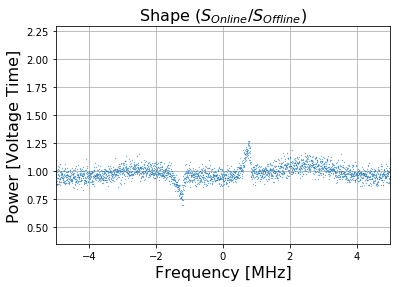

T_sys,coldsky =  650.458020414 K


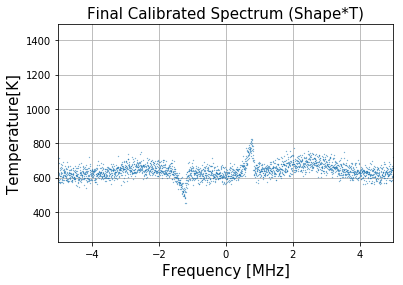

In [153]:

############################   7.2   ###################################
shape = np.fft.fftshift(mean1231)/np.fft.fftshift(mean1229)
plt.plot(f, shape, '.', markersize=0.5)
plt.title('Shape ($S_{Online}$/$S_{Offline}$)', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.xlim(-5,5)
plt.grid(True)
plt.show()

#########################   7.3   ####################################
sumsky = np.sum(skymean)
sumdiff = np.sum(bbmean - skymean)
t = (sumsky/sumdiff)*300 #in kevlin
print('T_sys,coldsky = ', t, 'K')

final = shape*t
plt.plot(f, final, '.', markersize=0.5)
plt.title('Final Calibrated Spectrum (Shape*T)',fontsize=15)
plt.xlim(-5,5)
plt.grid(True)
plt.ylabel('Temperature[K]',fontsize=15)
plt.xlabel('Frequency [MHz]',fontsize=15)
plt.show()

7.4 - Plotting Intensity vs Frequency and Velocity

In [ ]:
plt.plot(f, final)
dopv = -